<a href="https://colab.research.google.com/github/Ajamelot56/Projet_Visual_Attention/blob/master/PC_2022_VA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are working on the paper "Intrinsic and extrinsic effects on image memorability", which collected the FIGRIM dataset.

# Experimental setup according to the paper

There are 21 scene categories, containing 15 target images with the highest memorability score, and 15 target images with the lowest memorability score, for a total of 630 images.  
Image size is 1000×1000px.  
40 participants total.  
Target images were repeated 3 times, spaced by 50-60 images.
Each image was shown for 2s, then a forced-choice response was asked, then a 0.4s fixation cross.  
Equipment: A 19 inch CRT monitor with a resolution of 1280x1024, 22 inches from chinrest mount, 55 Hz, the image stimuli subtended 30 degrees of visual angle.



# Project setup

In [98]:
%matplotlib inline

import os
import glob
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage import gaussian_filter
from random import sample

# Accidentally put in another folder when unzipping
PATH_DATA = os.getcwd() + os.sep + "FIGRIM" + os.sep + "FIGRIM"


# Experiment-dependant constants
RESO_X = 1280
RESO_Y = 1024 
FACTOR_X = RESO_X/1000
FACTOR_Y = RESO_Y/1000 # Was originally 700x700 but gets upscaled for this experiment

n_classes = 21
n_images_per_class = 30
refresh_rate = 500
visual_angle = 30
distance = 558.8 #Converted from 22 inches to milimeters

In [73]:
# Unzip folder:
!unzip FIGRIM.zip -d FIGRIM

Archive:  FIGRIM.zip
replace FIGRIM/FIGRIM/Data/airport_terminal/sun_aaotjvucbfgmtzjj.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## How to read the given data

In [74]:
import scipy.io
#Checking one file
mat = scipy.io.loadmat(PATH_DATA + os.sep + "Data" + os.sep + "tower" + os.sep + "sun_anjawxwtumvzyjhe.mat")

According to the [repository](https://github.com/cvzoya/figrim) of the authors, the .mat files already contain the fixation data for each target image, however it is unclear whether this is the average of all participants and all repetitions, or some other construction, but we'll assume it is the average of all participants and all repetitions.

Before averaging, each fixation map was normalized beforehand by ignoring all fixations shorter than 100 ms and longer than 1500ms, and kept all that occured within the 2000ms recording segment.

While we have our work cut out for us, we still need to convert the data type inside the matrices to float to prevent compatibility errors:

In [75]:
converted_mat = mat["fixLocs"].astype(np.float64)

In [76]:
counter = 0
for array in converted_mat:
  for number in array:
    if number > 0:
      counter +=1
      #print(array)
print("Number of lines containing at least one 'fixation pixel':", counter)

Number of lines containing at least one 'fixation pixel': 119


In [78]:
def get_fixmap(img_name: str):
    """
    :param img_name: The name of the image without extension.
    
    """
    return scipy.io.loadmat(glob.glob(os.path.join(PATH_DATA, 'Data/**/' + img_name + '.mat'), recursive=True)[0])['fixLocs']

In [87]:
def get_salmap(fixmap: np.ndarray):
  return gaussian_filter(fixmap.astype(np.float32), 20)

In [90]:
truc = get_salmap(converted_mat)
type(truc)

numpy.ndarray

In [91]:
def show_salmap(salmap: np.ndarray):
    plt.imshow(salmap)
    plt.show()

In [88]:
def show_salmap_from_fixmap(fixmap: np.ndarray):
    plt.imshow(gaussian_filter(fixmap.astype(np.float32), 20))
    plt.show()

In [81]:
def compute_ppda(distance, h_res, v_res, screen_w, screen_h):
    """
    Compute the number of pixels per degree of visual angle based on the experimental conditions.
    
    :param distance: int, the distance between the observer and the screen (in mm)
    :param h_res: int, the horizontal resolution of the screen
    :param v_res: int, the vertical resolution of the screen
    :param screen_w: int, the width of the screen (in mm)
    :param screen_h: int, the height of the screen (in mm)
    :return horizontal_ppda: float, the number of pixel per degree of visual angle
    """    
    full_angle = math.atan2(screen_h/2, distance)
    d = 2 * distance * math.tan(full_angle/2)
    horizontal_ppda = d * screen_h / v_res
    vertical_ppda = d * screen_w / h_res

    return horizontal_ppda
# Reference values from paper.
distance = 558.8
h_res = 1280
v_res = 1024
screen_w = 1000
screen_h = 1000

ppda = compute_ppda(distance, h_res, v_res, screen_w, screen_h)

print(ppda) #this is way too high, let's just take 20 for now and ask the professor next wednesday.

417.00073660615027


While we can't see anything on our fixation map, the saliency maps provides information.

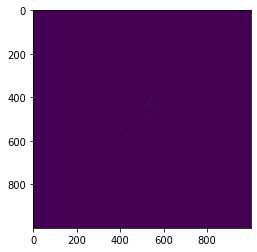

In [94]:
plt.imshow(converted_mat)
plt.show()

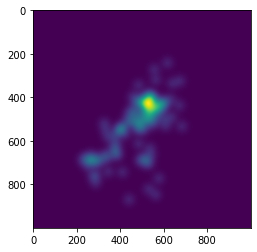

In [96]:
show_salmap_from_fixmap(converted_mat)

## Ground truth display

Display 5 random images, then display its saliency map

/content/FIGRIM/FIGRIM/Stimuli/playground/sun_bpxgmqnwboogllyq.jpg


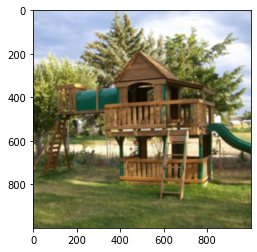

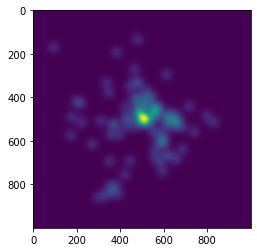

/content/FIGRIM/FIGRIM/Stimuli/conference_room/sun_btxdfkuoehgmlglt.jpg


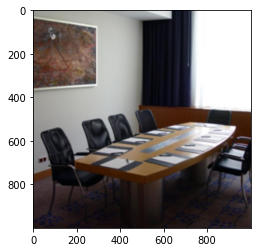

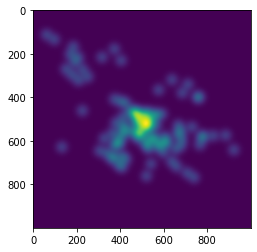

/content/FIGRIM/FIGRIM/Stimuli/bedroom/sun_aowdbaezjtqijnpa.jpg


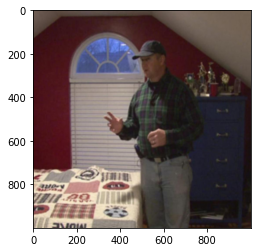

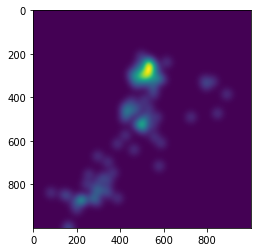

/content/FIGRIM/FIGRIM/Stimuli/bridge/sun_bsxmaijqwhrobhiy.jpg


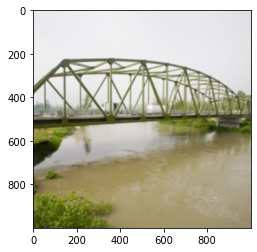

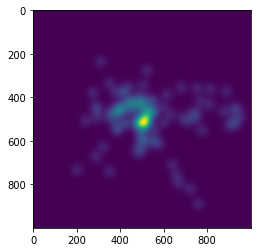

/content/FIGRIM/FIGRIM/Stimuli/skyscraper/sun_bsagyjjhnckuhqvz.jpg


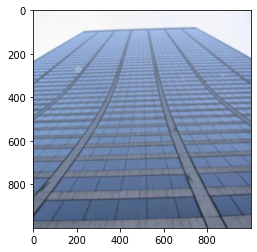

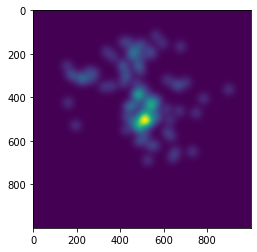

In [99]:
for image in sample(glob.glob(os.path.join(PATH_DATA, 'Stimuli', '**', '*.jpg')), 5):
    print(image)
    plt.figure()
    plt.imshow(mpimg.imread(image))
    plt.figure()
    fixmap = get_fixmap(os.path.basename(image)[:-4])
    show_salmap_from_fixmap(fixmap)

# Instantiating models

## The non-deep one

## The deep one

# Apply models and evaluate them

Compare performances, runtime, and anything that seems relevant.

Trouver un truc du genre "image to numpy load" pour generer des saliency maps depuis l'output jpeg ou png de certains models.

# Bonus: Fine-tune deep model used